In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Step 1: Load the dataset from URL
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)

# Step 2: Show first 5 rows of input data
print("First 5 rows of input data:")
print(df.head())

# Step 3: Preprocess the data
# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split into training and test sets (only normal class 0 for training)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
random_state=42)
X_train_normal = X_train[y_train == 0]
# Step 4: Build the Autoencoder model
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(X_train.shape[1],)),
tf.keras.layers.Dense(16, activation='relu'),
tf.keras.layers.Dense(8, activation='relu'),
tf.keras.layers.Dense(16, activation='relu'),
tf.keras.layers.Dense(X_train.shape[1], activation='linear')
])
model.compile(optimizer='adam', loss='mse')
# Step 5: Train the model using only normal transactions
model.fit(X_train_normal, X_train_normal, epochs=10, batch_size=256,
shuffle=True, verbose=0)
# Step 6: Predict and calculate reconstruction error


First 5 rows of input data:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step

Confusion Matrix:
[[54098  2766]
 [   15    83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.85      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.52     56962
weighted avg       1.00      0.95      0.97     56962



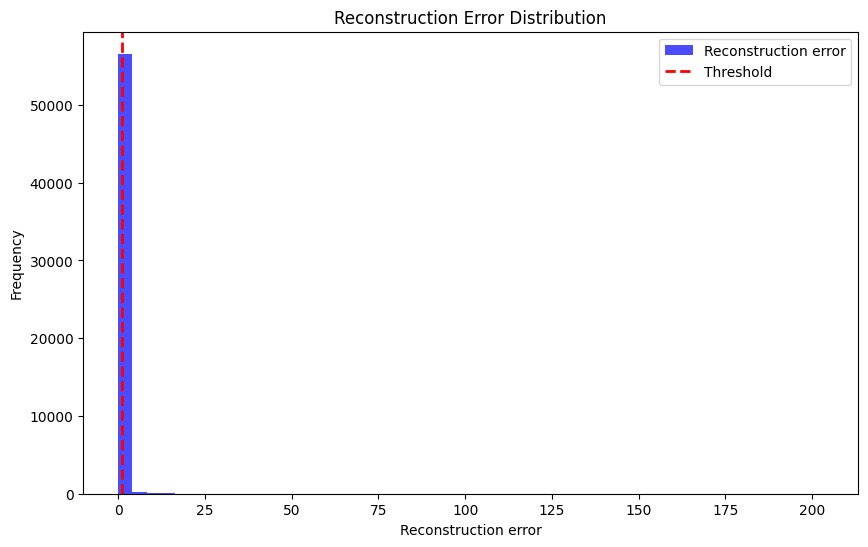

In [4]:
reconstructions = model.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)
# Step 7: Threshold for anomaly
threshold = np.percentile(mse, 95)
y_pred = (mse > threshold).astype(int)
# Step 8: Output performance
from sklearn.metrics import confusion_matrix, classification_report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Step 9: Visualize the reconstruction error
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50, alpha=0.7, color='blue', label='Reconstruction error')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label='Threshold')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')
plt.legend()
plt.show()
